# Project 2: Housing Price Prediction Project

# Information

This project is based on this kaggle challenge, with the datasets provided on there as well:
https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge

This is the first notebook for this project.

In this notebook, the steps conducted are:
   1. Data Cleaning
   2. Imputing Missing Values
   3. Feature Engineering
   4. Exploratory Data Analysis (EDA) of Numerical Variables
   5. EDA and transformation of SalePrice

# Background

The buying and selling of home properties is a big issue for many Americans given that some properties may be costly, and relocating for work or personal reasons is commonplace in countries as large as USA. Like everyone, buyers and sellers would want to negotiate and buy/sell their property for a price that is deemed reasonable by the market (as observed from past SalePrice), and hopefully minimize their losses (if the owners are desperate), and if possible, make a little profit off the transaction.

# Problem Statement

Given the self-interest of both the buyer and seller (or through their agents), there are many opportunity for people to capitalize on the asymmetric information of the other party by exploiting them in the form of under/over quoting them. To address this issue, my data-driven team of property agents developed a pricing model so that we can better advice our clients on the SalePrice they can expect to get in a fair trade, and the model's predictions can act as benchmarks to be used in negotiations. With the opening up borders and inter-state travelling returning, it is expected that there will be a greater need for our service and we will not only predict the expected house prices, but also the key areas of improvement homeowners can engage in to increase their chances of fetching a higher price when selling.

Based on the challenge information, the metric of interest of the models will be Root Mean Square Error (RMSE).

# Importing Libraries

In [1]:
# Usual libraries
import pandas as pd
import numpy as np

# For visualization and EDA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

# Machine Learning
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

# For preprocessing
from sklearn.preprocessing import StandardScaler

# To save list of numerical variables for use later
import pickle

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
# Importing both the training dataset
data = pd.read_csv("../data/train.csv")

In [3]:
# To expand display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Creating Functions to be used later

### Creating Formula to Retrieve Numeric and Categorical Variables

This is done as a succinct way to retrieve categorical and numerical variables in the dataset.

In [4]:
def get_cat_var(data):
    cat_var = []
    for feature in data:
        if data[feature].dtype == object:
            cat_var.append(feature)
        else:
            pass
    return cat_var

In [5]:
def get_num_var(data):
    num_var = []
    for feature in data:
        if data[feature].dtype != object:
            num_var.append(feature)
        else:
            pass
    return num_var

### Creating a Function to return Columns with Missing Data

In [6]:
def check_missing_data():
    num_of_missing_val = pd.DataFrame(data.isna().sum())

    # Renaming the column name of dataframe from 0 to 'Missing_Count'
    num_of_missing_val = num_of_missing_val.rename(columns={0: 'Missing_Count'})

    # Sorting in descending order
    num_of_missing_val = num_of_missing_val.sort_values(by = 'Missing_Count', ascending = False)

    # Filtering features with missing values
    num_of_missing_val = num_of_missing_val.loc[num_of_missing_val['Missing_Count']!= 0,:]
    print(num_of_missing_val)

    # To retrieve number of features with missing values
    print(num_of_missing_val.shape)

# Investigating Data

In [7]:
# For initial investigation of dataset provided
data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Id and PID seem to just be indexes for recordkeeping purposes and are not useful in predicting SalePrice. Removing them as part of preprocessing.

In [8]:
# Dropping the Id and PID columns
data.drop(columns = ['Id','PID'], inplace = True)

# To check if they are dropped
data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [9]:
# Looking at the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

# Converting to the Correct Data Types

This is done because some variables are categorical in nature, but are saved as integers, which the model will assume as a cardinal feature. There is a need to change them to strings to be binarized later.

The conversions are done to the following variables:
* MS SubClass
* Mo Sold
* Overall Qual
* Overall Cond

In [10]:
# Noticed that MS SubClass, Overall Qual, and Overall Cond values are shown as integers but should be categorical, thus need to change to string
data = data.astype({'MS SubClass': str, 'Overall Qual': str, 'Overall Cond': str}, errors = 'raise')

# To check
print(data['MS SubClass'].dtype)
print(data['Overall Qual'].dtype)
print(data['Overall Cond'].dtype)

object
object
object


In [11]:
# Mo Sold (Month Sold) variable should be made into a categorical variable as it make more contextual meaning.
Mo_Sold_mapping = {1 : 'Jan', 2 : 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',
                  11: 'Nov', 12: 'Dec'}
data['Mo Sold'] = data['Mo Sold'].replace(Mo_Sold_mapping)

# To check
data['Mo Sold'].dtype

dtype('O')

We now observe that the datatypes are correctly converted to string.

# Investigating and Addressing Missing Data

In [12]:
# Producing columns with missing values
check_missing_data()

                Missing_Count
Pool QC                  2042
Misc Feature             1986
Alley                    1911
Fence                    1651
Fireplace Qu             1000
Lot Frontage              330
Garage Finish             114
Garage Qual               114
Garage Yr Blt             114
Garage Cond               114
Garage Type               113
Bsmt Exposure              58
BsmtFin Type 2             56
Bsmt Cond                  55
Bsmt Qual                  55
BsmtFin Type 1             55
Mas Vnr Area               22
Mas Vnr Type               22
Bsmt Full Bath              2
Bsmt Half Bath              2
Garage Area                 1
Garage Cars                 1
Total Bsmt SF               1
Bsmt Unf SF                 1
BsmtFin SF 2                1
BsmtFin SF 1                1
(26, 1)


### Dropping observations with small missing values counts

There are a handful of variables with one or two missing observations. Decide to drop those rows.

In [13]:
data = data.dropna(how = 'any',
                    # These are the variables with 1 or 2 missing values as seen above
                    subset = ['Garage Area', 'Bsmt Unf SF', 'BsmtFin SF 2', 'BsmtFin SF 1', 'Bsmt Full Bath', 'Bsmt Half Bath'])

In [14]:
# Checking updated set of variables with missing values
num_of_missing_val = check_missing_data()

                Missing_Count
Pool QC                  2039
Misc Feature             1983
Alley                    1908
Fence                    1650
Fireplace Qu              998
Lot Frontage              330
Garage Type               113
Garage Yr Blt             113
Garage Qual               113
Garage Cond               113
Garage Finish             113
Bsmt Exposure              56
BsmtFin Type 2             54
Bsmt Cond                  53
BsmtFin Type 1             53
Bsmt Qual                  53
Mas Vnr Area               22
Mas Vnr Type               22
(18, 1)


It can be observed that Pool QC (Pool Quality), Misc Feature, Alley, and Fence are the 4 variables with the most missing values, each with at least 80% (1639) missing values.

In [15]:
# Removing the 4 features due to high count of missing values
data = data.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence'])

In [16]:
# Checking updated set of variables with missing values
check_missing_data()

                Missing_Count
Fireplace Qu              998
Lot Frontage              330
Garage Type               113
Garage Cond               113
Garage Yr Blt             113
Garage Finish             113
Garage Qual               113
Bsmt Exposure              56
BsmtFin Type 2             54
BsmtFin Type 1             53
Bsmt Cond                  53
Bsmt Qual                  53
Mas Vnr Area               22
Mas Vnr Type               22
(14, 1)


For the remaining variables, there is a need to impute missing data before conducting EDA and feature engineering.

# Imputing Missing Values

From the above list of variables with missing observations along with the frequency of those missing values, an interesting observation is that groups of those variables share the similar frequencies of missing values. Namely:

* Fireplace Qu: 998
* Lot Frontage: 330
* Garage variables: 113
* Basement: 53 to 56
* Masonry Veneer: 22

### Imputing Fireplace Qu

For this variable, we assume that these properties do not have any fireplace, and thus will take on the value 'None'.

In [17]:
data['Fireplace Qu'].fillna('None', inplace = True)

### Imputing Lot Frontage (Part 1)

For this variable, the lot frontage (Linear feet of street connected to property) should be similar to the other properties within the same neighbourhood. Missing Lot Frontage values will take on the median value of the lot frontage based on the neighbourhood.

In [18]:
data['Lot Frontage'] = data.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda x: x.fillna(x.median()))

### Imputing Garage variables

For these variables, we assume that those properties do not have any garage.

For Garage Yr Blt, any missing values will be imputed with the same year the building is sold. This is because the column will be used to calculate a new column (GarageAge) by subtracting Garage Yr Blt from Yr Sold. Any property with no basement will have GarageAge value of 0.

For Garage Finish, Garage Qual, Garage Cond, and Garage Type, they will be replaced with 'None' instead of NA, despite the dictionary using NA to represent 'No Garage' for these variables. This is because Python will treat those NA values as missing values and will cause an error when running the regression models later.

In [19]:
data['Garage Yr Blt'].fillna(data['Yr Sold'], inplace = True)

##### Note that to fillna for multiple columns, it has to be done in the following way:

In [20]:
garage_dict = {'Garage Finish': 'None', 'Garage Qual': 'None', 'Garage Cond': 'None', 'Garage Type': 'None'}

In [21]:
data.fillna(garage_dict, inplace = True)

### Imputing Basement variables

For these variables, we assume that those properties do not have any basement.

For Bsmt Exposure, Bsmt Fin Type 2, Bsmt Cond, Bsmt Fin Type 1, and Bsmt Qual, they will be replaced with 'None' instead of NA, despite the dictionary using NA to represent 'No Basement' for these variables. This is because Python will treat those NA values as missing values and will cause an error when running the regression models later.

In [22]:
basement_dict = {'Bsmt Exposure': 'None', 'BsmtFin Type 2': 'None', 'Bsmt Cond': 'None', 
               'BsmtFin Type 1': 'None', 'Bsmt Qual': 'None'}

In [23]:
data.fillna(basement_dict, inplace = True)

### Imputing Masonry variables

For these variables, we assume that those properties do not have any masonry veneers.

For Mas Vnr Area, any missing values will be set to 0.

For Mas Vnr Type, any missing values will be set to 'None'.

In [24]:
data['Mas Vnr Area'].fillna(0, inplace = True)

In [25]:
data['Mas Vnr Type'].fillna('None', inplace = True)

### Imputing Lot Frontage (Part 2)

In [26]:
check_missing_data()

              Missing_Count
Lot Frontage              3
(1, 1)


The 3 missing values of Lot Frontage are due properties in 2 neighborhoods: GrnHill and Landmrk, having only 2 and 1 properties respectively. These 3 observations are the ones with missing Lot Frontage values and have no other values to base the median on.

The median Lot Frontage of all values will be used to impute the 3 missing values of Lot Frontage as there are no additional information provided for us to make a more precise approximation.

In [27]:
data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace = True)

In [28]:
check_missing_data()

Empty DataFrame
Columns: [Missing_Count]
Index: []
(0, 1)


The missing values are all imputed.

# Feature engineering (Part 1)

This is done I believe the age of property/ years since last renovation and the age of Garage (if any garage exists) are significant factors in influencing SalePrice.

In [29]:
# Transforming Year Built, Year Remod/Add, and Garage Yr Blt to PropertyAge, PropertyModAge, and GarageAge, respectively.
# This is done by deducting the value of the respective columns from Yr Sold.

data['PropertyAge'] = data['Yr Sold'] - data['Year Built']
data['PropertyModAge'] = data['Yr Sold'] - data['Year Remod/Add']
data['GarageAge'] = data['Yr Sold'] - data['Garage Yr Blt']

# Dropping the original columns to avoid high multicollinearity
data.drop(columns = ['Yr Sold', 'Year Built', 'Year Remod/Add','Garage Yr Blt'], inplace = True)

# Sanity Check

This is to done ensure that the values of the numerical variables make sense, e.g. years sold/built should not be in the future, negative counts of features, etc.

In [30]:
# Retrieving list of numerical variables
num_var = get_num_var(data)
num_var.remove('SalePrice')

In [31]:
for variable in num_var:
    print(data[variable].describe(), '\n')

count    2048.000000
mean       69.162354
std        21.658847
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64 

count      2048.000000
mean      10049.675293
std        6697.167566
min        1300.000000
25%        7500.000000
50%        9432.000000
75%       11512.750000
max      159000.000000
Name: Lot Area, dtype: float64 

count    2048.000000
mean       98.770996
std       174.411461
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64 

count    2048.000000
mean      442.464844
std       461.319862
min         0.000000
25%         0.000000
50%       368.000000
75%       734.000000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64 

count    2048.000000
mean       48.005859
std       165.074675
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000


It can be observed that 3 numerical variables - PropertyAge, PropertyModAge, and GarageAge have negative minumum values. It does not make sense as that would mean that the properties are sold before they are built/modified, or that the garages are built before the property.

To address this issue, those values will be converted to 0.

In [32]:
to_fix = ['PropertyAge', 'PropertyModAge', 'GarageAge']

In [33]:
# Goes through each column in the to_fix list, if the value in col is <0, it will take on value 0, else, the value remains
for variable_to_fix in to_fix:
    data[variable_to_fix] = np.where(data[variable_to_fix] < 0, 0, data[variable_to_fix])

In [34]:
# To check if the minimum values of these columns are set to 0
data[to_fix].describe()

,PropertyAge,PropertyModAge,GarageAge
count,2048.000000,2048.000000,2048.000000
mean,36.024902,23.583496,27.538574
std,30.207212,21.016635,25.148537
min,0.000000,0.000000,0.000000
25%,7.000000,4.000000,4.000000
50%,34.000000,15.000000,22.000000
75%,54.000000,43.000000,46.000000
max,136.000000,60.000000,114.000000


The issue is addressed as the minimum values of these 3 columns are now set as 0. Also, the other percentile summary statistics remain the same (cannot use the maintaining of mean and std as points of check given the changing of values), which means that the correction is properly executed.

# Exploratory Data Analysis of Numerical Explanatory Variables

# Correlation Analysis

In [35]:
# Creating a series of correlations between numerical and 
correlation = data[data.columns[1:]].corr()['SalePrice'][:].sort_values(ascending = False)
correlation

SalePrice          1.000000
Gr Liv Area        0.698046
Garage Area        0.650000
Garage Cars        0.648103
Total Bsmt SF      0.631507
1st Flr SF         0.621181
Full Bath          0.537369
Mas Vnr Area       0.504025
TotRms AbvGrd      0.502909
Fireplaces         0.470091
BsmtFin SF 1       0.424463
Lot Frontage       0.338728
Open Porch SF      0.332090
Wood Deck SF       0.327007
Lot Area           0.295121
Bsmt Full Bath     0.283564
Half Bath          0.282023
2nd Flr SF         0.249091
Bsmt Unf SF        0.191090
Bedroom AbvGr      0.135178
Screen Porch       0.134652
3Ssn Porch         0.048755
Pool Area          0.023115
BsmtFin SF 2       0.016393
Misc Val          -0.007398
Low Qual Fin SF   -0.041650
Bsmt Half Bath    -0.045378
Kitchen AbvGr     -0.125593
Enclosed Porch    -0.135516
GarageAge         -0.444094
PropertyModAge    -0.551441
PropertyAge       -0.572295
Name: SalePrice, dtype: float64

Of the numerical variables, there are variables that are strongly positively correlated with the target variable (SalePrice) such as Above grade (ground) living area square feet (Gr Liv Area), garage area, and size of garage cars in car capacity (Garage Cars). On the other end, there are variables that are strongly negatively correlated with SalePrice such as Property Age, years from last renovation or modification (PropertyModAge), and garage age.

However, there are variables that are not strongly correlated with SalePrice such as Three season porch area in square feet (3Ssn Porch), pool area, basement type 2 finshed square feet (BsmtFin SF 2), value of miscellaneous features (Misc Val), based on the small magnitude of the correlation coefficient.

In [36]:
# Finding abosulte correlation values to rank later
correlation_abs = pd.DataFrame(correlation.abs().sort_values(ascending = False))

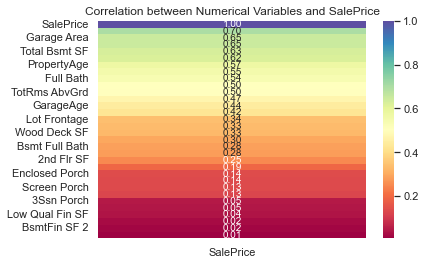

In [37]:
# Plotting the heatmap scale of correlation magnitudes
sns.set(rc = {'figure.figsize':(10,12)})
corr_plot = sns.heatmap(correlation_abs, annot = True, fmt='.2f', cmap= "Spectral")
corr_plot.set_title('Correlation between Numerical Variables and SalePrice');

##### Based on the correlation values against SalePrice, explanatory variables will be based on the abosolute value of the correlation being less than 0.20.

In [38]:
# Subsetting the features with high correlation with SalePrice
corr_mat_high_corr = correlation_abs.loc[(correlation_abs['SalePrice'] > 0.20) | (correlation_abs['SalePrice'] < -0.20),:]
print(corr_mat_high_corr)
print(corr_mat_high_corr.index)

                SalePrice
SalePrice        1.000000
Gr Liv Area      0.698046
Garage Area      0.650000
Garage Cars      0.648103
Total Bsmt SF    0.631507
1st Flr SF       0.621181
PropertyAge      0.572295
PropertyModAge   0.551441
Full Bath        0.537369
Mas Vnr Area     0.504025
TotRms AbvGrd    0.502909
Fireplaces       0.470091
GarageAge        0.444094
BsmtFin SF 1     0.424463
Lot Frontage     0.338728
Open Porch SF    0.332090
Wood Deck SF     0.327007
Lot Area         0.295121
Bsmt Full Bath   0.283564
Half Bath        0.282023
2nd Flr SF       0.249091
Index(['SalePrice', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'PropertyAge', 'PropertyModAge',
       'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'GarageAge',
       'BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF',
       'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF'],
      dtype='object')


### Removing Numerical Variables with low correlation with SalePrice

These variables have less than 0.20 correlation with SalePrice.

In [39]:
num_data = data[data.columns.intersection(list(corr_mat_high_corr.index))]
print(num_data.columns)
print(len(num_data.columns))

Index(['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'PropertyAge', 'PropertyModAge',
       'GarageAge'],
      dtype='object')
21


In [40]:
# Dropping numerical variables with low correlation with SalePrice
data = data.drop(columns = ['Bsmt Unf SF', 'Enclosed Porch', 'Bedroom AbvGr', 'Screen Porch', 'Kitchen AbvGr', '3Ssn Porch', 
                            'Bsmt Half Bath', 'Low Qual Fin SF', 'Pool Area', 'BsmtFin SF 2', 'Misc Val' ])
data.shape

(2048, 63)

The variables dropped from the dataset are Bsmt Unf SF, Enclosed Porch, Bedroom AbvGr, Screen Porch, Kitchen AbvGr, 3Ssn Porch, Bsmt Half Bath, Low Qual Fin SF, Pool Area, BsmtFin SF 2, Misc Val.

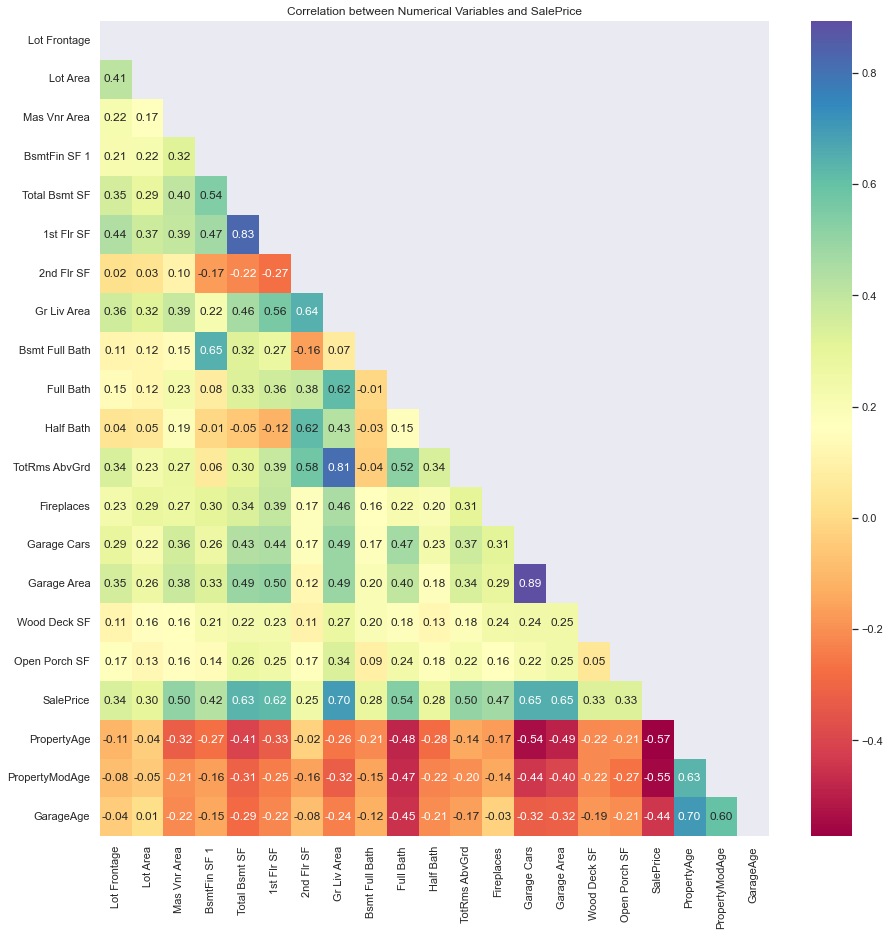

In [41]:
# Plotting correlation heatmap between SalePrice and remaining numerical variables
sns.set(rc = {'figure.figsize':(15,15)})
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
corr_plot_new = sns.heatmap(data.corr(), annot = True, fmt='.2f', cmap= 'Spectral', mask = mask)
corr_plot_new.set_title('Correlation between Numerical Variables and SalePrice');

In [42]:
# Retrieving list of remaining numerical variables
remaining_num_var = get_num_var(data)

<Figure size 1152x1152 with 0 Axes>

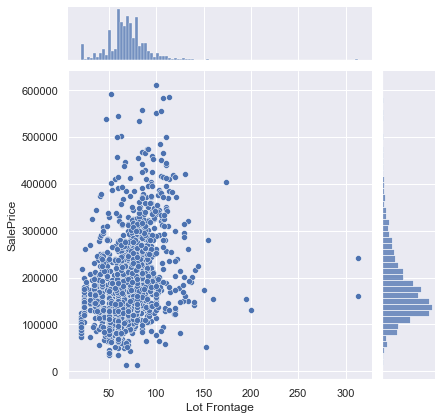

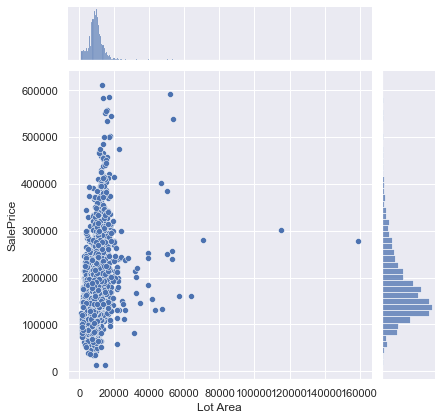

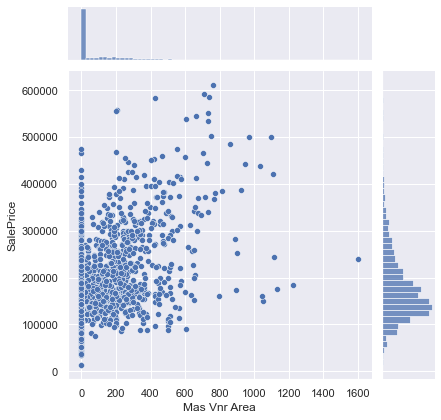

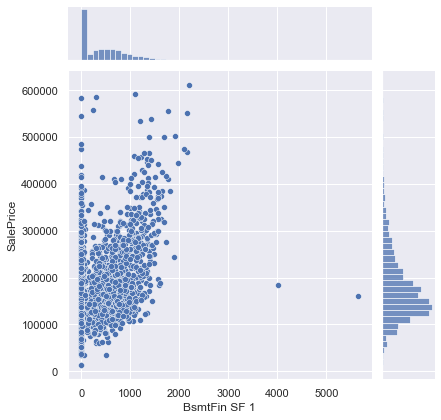

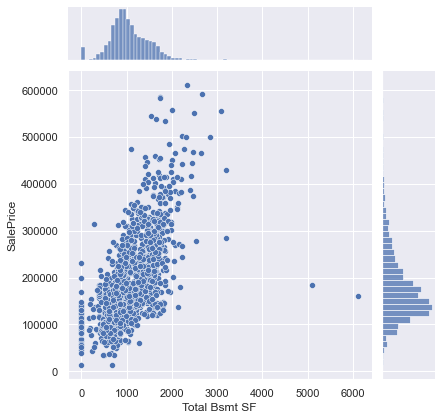

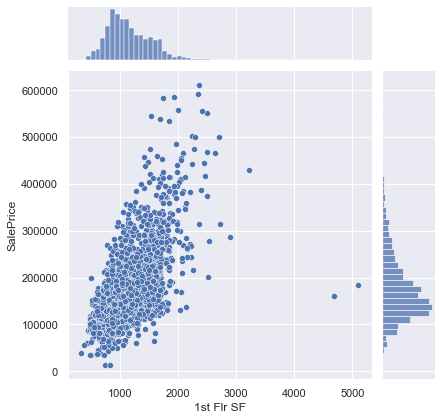

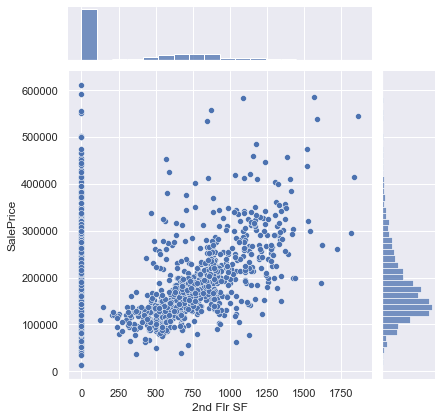

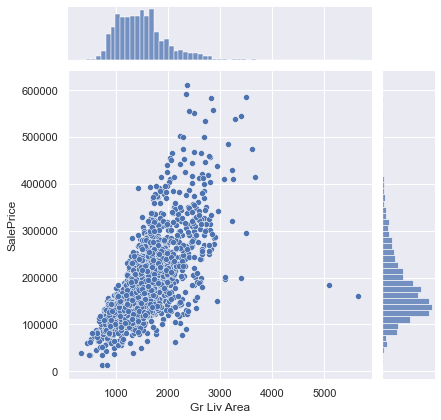

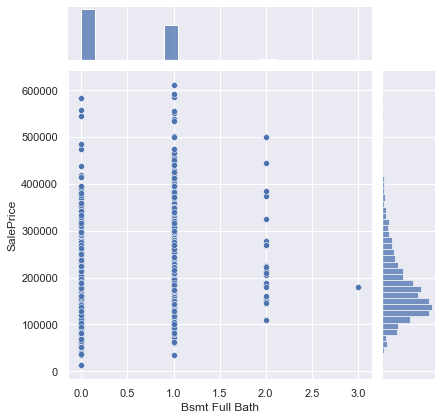

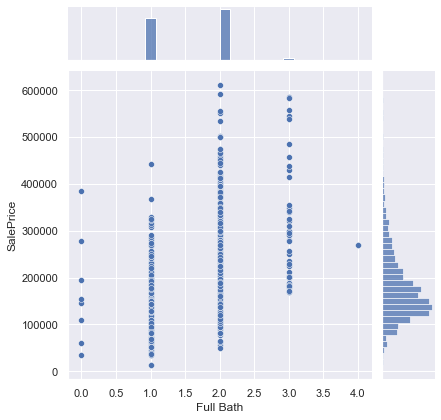

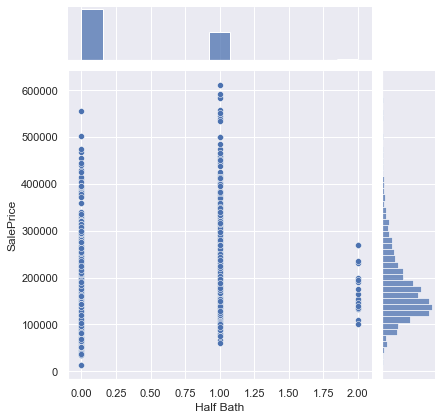

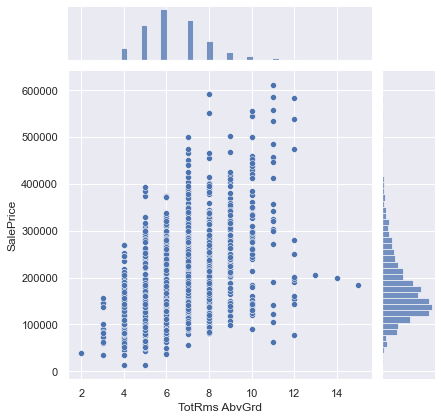

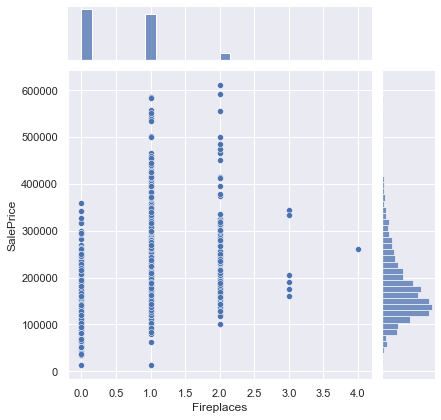

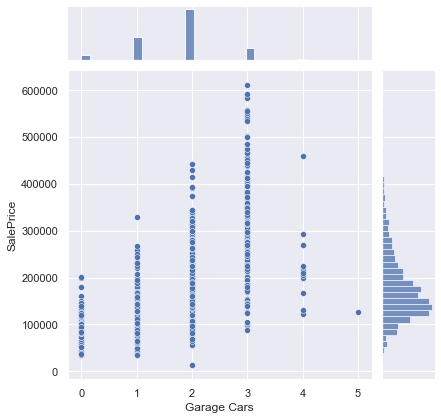

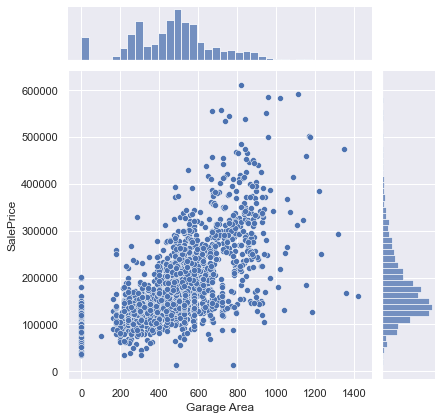

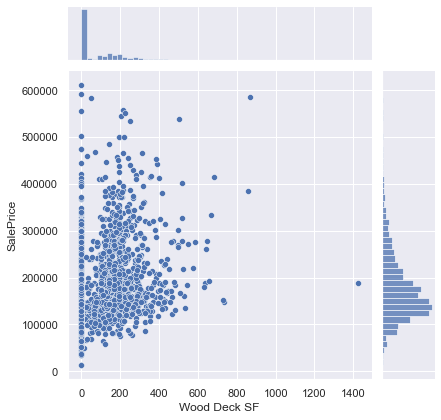

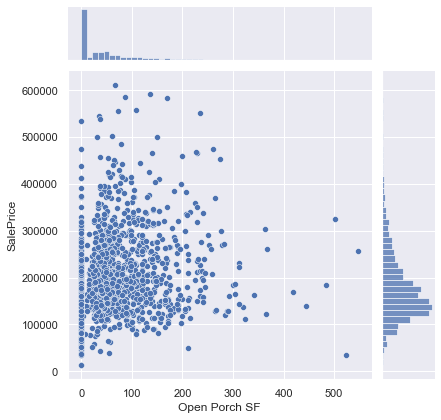

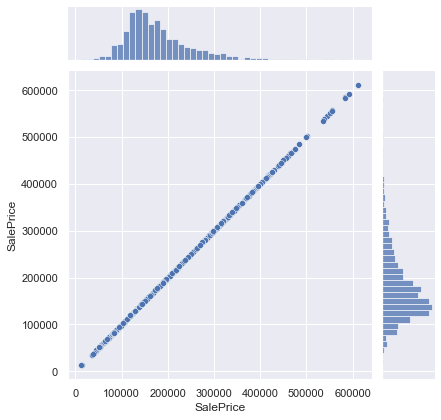

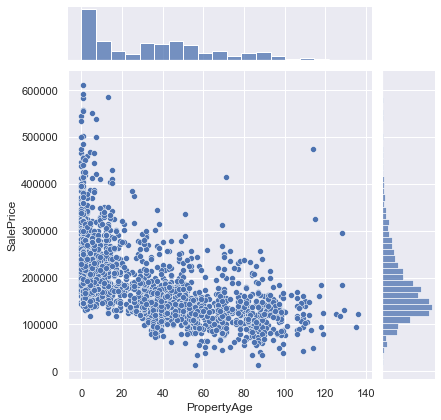

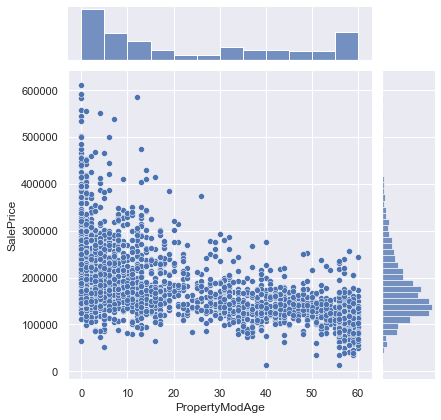

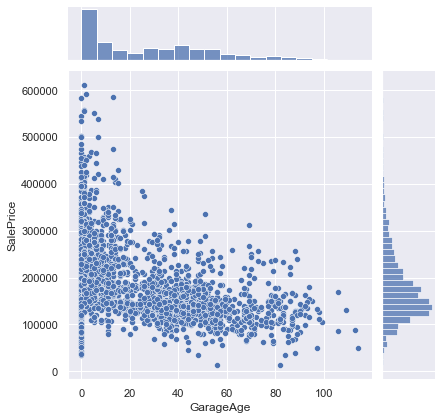

In [43]:
# Plotting scatterplot between each numerical variable against SalePrice
fig = plt.figure(figsize = (16,16))
for variable in remaining_num_var:
    sns.jointplot(x= data[variable], y= data['SalePrice']);

It can be argued that continuous explanatory variables do not have a notable non-linear relationship with SalePrice. This pattern of linearity will be strengthened after applying a log-transformation to the SalePrice as done below.

# Exploratory Data Analysis on SalePrice

In [44]:
data['SalePrice'].describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64


 mu = 181484.25 and sigma = 79229.31



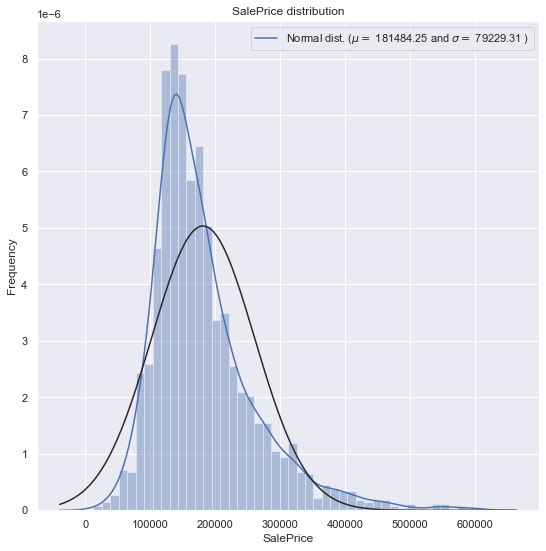

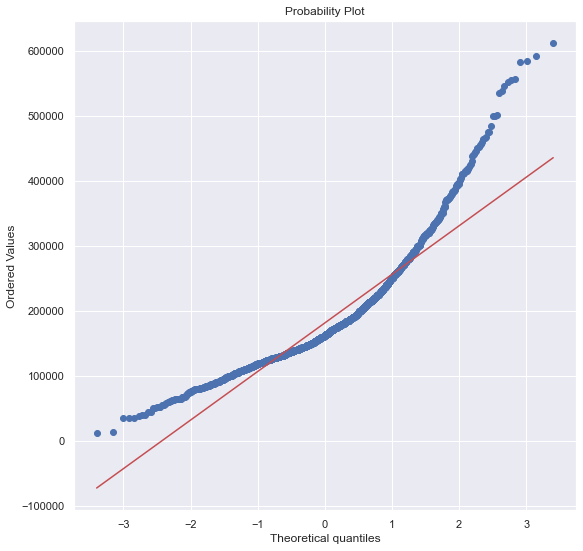

In [45]:
# Plotting the histogram of SalePrice
sns.set(rc = {'figure.figsize':(9,9)})
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot = plt)
plt.show()

It can be observed from the first plot that SalePrice is right skewed with the dark blue curve having a flat right tail. Similar note can be observed from the second plot where higher SalePrices deviate further away from the theoretical quantiles as compared to those with lower SalePrices.

Since linear models tend to do better with normally distributed data, we can use log-transformation to make SalePrice closer to being normally distributed.

### Log-Transformation of SalePrice


 mu = 12.02 and sigma = 0.41



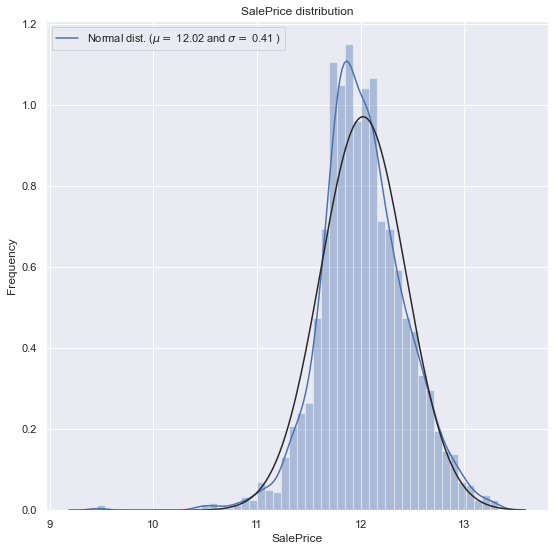

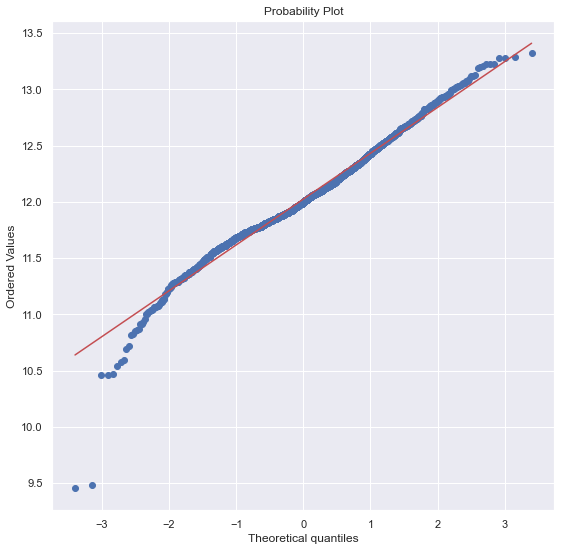

In [46]:
# Applying log-transform to SalePrice
data['SalePrice'] = np.log(data['SalePrice'])

# Check the new distribution 
sns.distplot(data['SalePrice'] , fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot = plt)
plt.show()

It can be observed from the first plot that the actual (dark blue) and theoretically normal (black) curves are more aligned and share a more similar shape as compared to before the log-transformation. In the second plot, points with higher SalePrices are much more in line with theoretical quantiles.

Both of these observations indicate that the log-transformed SalePrice more closely resembles a normally distributed variable.

# Exporting Dataset

In [47]:
data.to_csv('../data/data_v1.csv', index = False)

In [48]:
data.shape

(2048, 63)

With 63 columns in the dataset and 21 of them are numerical (including SalePrice), that would leave the remaining 42 variables are categorical.

In [49]:
# Exporting list of numerical variables for use later
pickle.dump(remaining_num_var, open("../data/numerical_variables.pkl", "wb"))